In [1]:
%pylab inline
import sys 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sympy import *

Populating the interactive namespace from numpy and matplotlib


## Create data toy

In [2]:
x_single = np.arange(-5, 5, 0.1)
x = np.resize(x_single,(3,len(x_single)))

nb_obj = 100

### Gaussian curves

In [3]:
def fun_gauss(x,mu,sigma):
    y_out =  np.exp( - (x - mu)**2 / (2 * sigma**2))
    return y_out


mu = random.uniform(-2, 2, nb_obj)
sigma = random.uniform(0, 2, nb_obj)

y_gauss = []
for i in range(nb_obj):
    shape = fun_gauss(x_single,mu[i],sigma[i])
    if choice([1,0])==1:
        y_gauss.append(-shape)
    else :
        y_gauss.append(shape)

### Double step functions

In [4]:
width = random.uniform(1, 1.5, nb_obj)
width2 = random.uniform(1, 1.5, nb_obj)
start = random.uniform(-5, 2, nb_obj)
height = random.uniform(-3, 3, nb_obj)
height2 = random.uniform(-3, 3, nb_obj)

y_step = []
for i in range(len(x_single)):
    temporary = []
    for j in x_single:
        
        if start[i]<j<start[i]+width[i]:
            temporary.append(height[i])
        elif start[i]+width[i]<j<start[i]+width[i]+width2[i]:
            temporary.append(height2[i])
        else :
            temporary.append(0)
    y_step.append(temporary)

### Line functions

In [5]:
a = random.uniform(-2,2, nb_obj)
b = random.uniform(0, 2, nb_obj)

y_line = []
for i in range(len(a)):
    y_line.append(a[i]*x_single+b[i])

## Plot random toys 

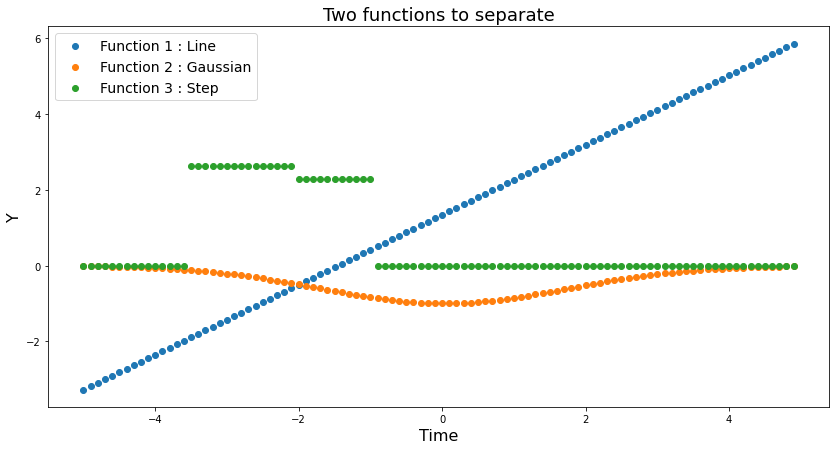

In [6]:
show = randint(0,nb_obj )

plt.figure(figsize=(14,7))

plt.scatter(x_single,y_line[show],label='Function 1 : Line')
plt.scatter(x_single,y_gauss[show],label='Function 2 : Gaussian')
plt.scatter(x_single,y_step[show],label='Function 3 : Step')


plt.title('Two functions to separate',fontsize = 18)
plt.xlabel('Time',fontsize = 16)
plt.ylabel('Y',fontsize = 16)
plt.legend(fontsize = 14)
plt.pause(1)

## Feature extraction
### Compute standard deviation and mean of each toy

In [7]:
std_gauss = np.std(y_gauss,axis=1)
mean_gauss = np.mean(y_gauss,axis=1)

std_line = np.std(y_line,axis=1)
mean_line = np.mean(y_line,axis=1)

std_step = np.std(y_step,axis=1)
mean_step = np.mean(y_step,axis=1)

### Plot the parameter space

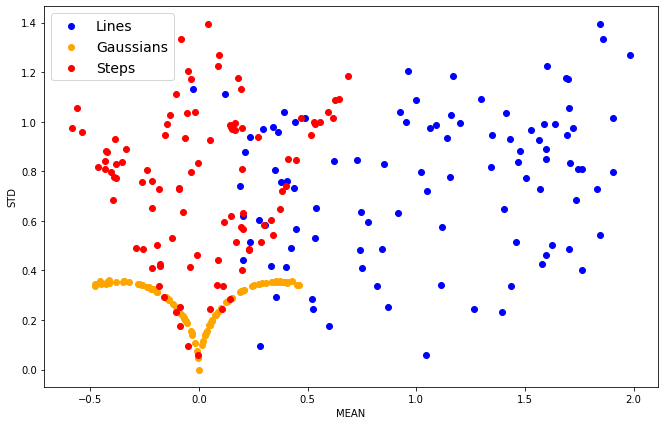

In [8]:
plt.figure(figsize=(11,7))

plt.scatter(mean_line,std_step,label = 'Lines',c='blue')
plt.scatter(mean_gauss,std_gauss,label = 'Gaussians',c='orange')
plt.scatter(mean_step,std_step,label = 'Steps',c='red')

plt.xlabel('MEAN')
plt.ylabel('STD')
plt.legend(fontsize = 14)

## Prepare the data for genetic evolution

### Choose an attractor goal value for each type of object

In [9]:
goalline= 10
goalgauss= -10
goalstep=0

labelline = ['Line']*len(std_line)
labelgauss = ['Gaussian']*len(std_gauss)
labelstep = ['Step']*len(std_step)

dic_classes = {labelline[0]:goalline, labelgauss[0]:goalgauss, labelstep[0]:goalstep}
dic_classes

{'Line': 10, 'Gaussian': -10, 'Step': 0}

### Create the data frame

In [10]:
data = pd.DataFrame(data = {'STD': list(std_line)+list(std_gauss)+list(std_step),
                            'MEAN': list(mean_line)+list(mean_gauss)+list(mean_step),
                            'TARGET': labelline+labelgauss+labelstep})


# Then split it into train and test samples
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,['MEAN','STD']], data.loc[:,'TARGET'], test_size=0.30, random_state=42)

data.head()

,STD,MEAN,TARGET
0,1.839057,1.090039,Line
1,2.364440,0.356939,Line
2,0.674310,1.063216,Line
3,1.873618,1.636178,Line
4,3.315241,0.742452,Line


## Evolve towards ideal function

In [11]:
#Import evolution scripts
sys.path.append(os.path.abspath('../Scripts'))
from create_model import *

### Choose the parameters 

In [18]:
features = X_train
classes = y_train

save = 'Saves/toy_example2'
population_size=1000
generations=300

### Create your function

In [19]:
model = evolve(features, classes, dic_classes, save, population_size=population_size, generations=generations)

# Print the mathematical equation of the function
sympify((str(model._program)), locals=converter)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.48          178.535       31          5.19179          6.22101      2.77m
   1     9.10          7.51682       32          4.90475          5.53294      2.56m
   2     9.76          6.73841       31           4.4932          5.53232      2.73m
   3    11.22          7.69178       31          4.03262          3.77974      2.44m
   4    14.22           6.3897       34          3.88599            4.957      2.60m
   5    16.40          5.81704       32          3.69496          5.76106      3.16m
   6    17.49          6.88626       36          3.52747          5.59623      2.94m
   7    17.19          5.36169       42          3.39059          6.56994      2.91m
   8    17.70           5.2115       32          3.46931          4.67135  

  94    63.19          3.78933       64          1.77709          4.08678      3.23m
  95    59.33          4.47641       84          1.81396          3.94903      3.17m
  96    61.70          3.76835       64          1.71472          4.64809      3.18m
  97    61.52          3.66224       64          1.76666          4.48105      3.14m
  98    63.23          4.60776       71          1.79147          4.28432      3.17m
  99    62.83           4.0416       64          1.66099           4.8377      3.17m
 100    62.53          3.85007       61          1.76507          5.20051      3.13m
 101    61.28          3.41343       72          1.76277          3.29474      3.08m
 102    61.77          3.75709       70          1.75471          3.26122      3.10m
 103    62.72          3.24005       65          1.71813          4.36812      3.12m
 104    62.23          3.96546       69          1.75104          3.78412      3.08m
 105    63.18          3.53933       70           1.7697         

 191    67.29          3.54887       71          1.61988          3.90692      1.90m
 192    68.02            3.578       68          1.51291          4.97558      1.88m
 193    66.64          3.37358       67          1.64737          3.75821      1.84m
 194    68.33          3.59838       79           1.6749          4.48312      1.90m
 195    67.81          3.34591       68          1.58945          4.28673      1.84m
 196    68.39          4.15863       70          1.62297          4.07181      1.81m
 197    67.42          3.68251       69          1.63308          3.67582      1.81m
 198    66.39          3.51046       69          1.62624          3.73738      1.81m
 199    66.71          5.78571       68           1.6266          4.04693      2.10m
 200    68.03          4.62965       71          1.64179          3.77094      1.65m
 201    66.95          3.67647       69          1.72696           2.8309      1.78m
 202    66.26          3.76243       70          1.53514         

 288    66.42          3.43147       68          1.61663          3.68862     13.11s
 289    66.96          3.58085       68          1.52732           4.4924     11.22s
 290    66.39          3.98662       69          1.64604          3.90401      9.96s
 291    68.58            3.323       68           1.6086          3.76082      9.05s
 292    66.62          3.46674       68          1.67742          3.14145      7.94s
 293    67.42          3.27511       68          1.60972          3.75077      6.62s
 294    65.21          3.79072       68          1.61429           3.7096      5.41s
 295    67.27          3.30771       68           1.6513          3.37655      4.37s
 296    67.96          5.91076       68          1.59365          3.89538      3.31s
 297    66.62           3.7857       68           1.6586          3.31088      2.18s
 298    66.92            3.384       68          1.61159          3.73391      1.11s
 299    66.25          3.56488       69           1.6461         

MEAN + 2*STD + 2*cos(1/STD) - cos(STD) - 2*cos(MEAN + STD) - cos(sin(1/STD)) - (cos(STD + cos(cos(1/STD))) - cos(MEAN + 2*STD + cos(1/STD) - cos(STD) + cos(cos(1/sin(STD)) - 0.605024252245974) - 0.707/STD))/STD

NB : A save of this function is created in a .pkl file

## Analyse the performance of the model

In [24]:
# Import the plotting scripts
sys.path.append(os.path.abspath('../Scripts'))
from plot import *

### Choose parameters

In [25]:
# For the dictionary, we simply reverse the previous one
dic_goals = {v: k for k, v in dic_classes.items()}

function = model
classes = y_test
features = X_test

### Scatter plots :

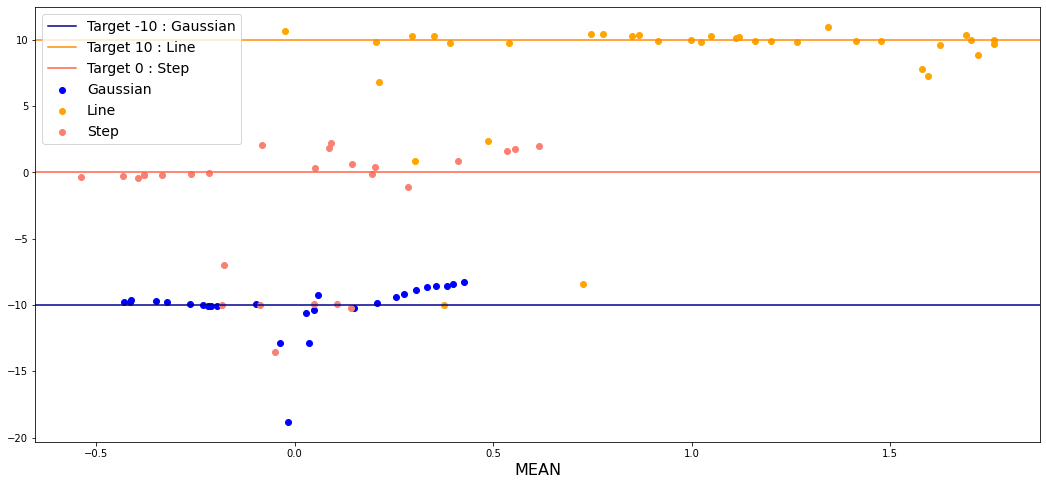

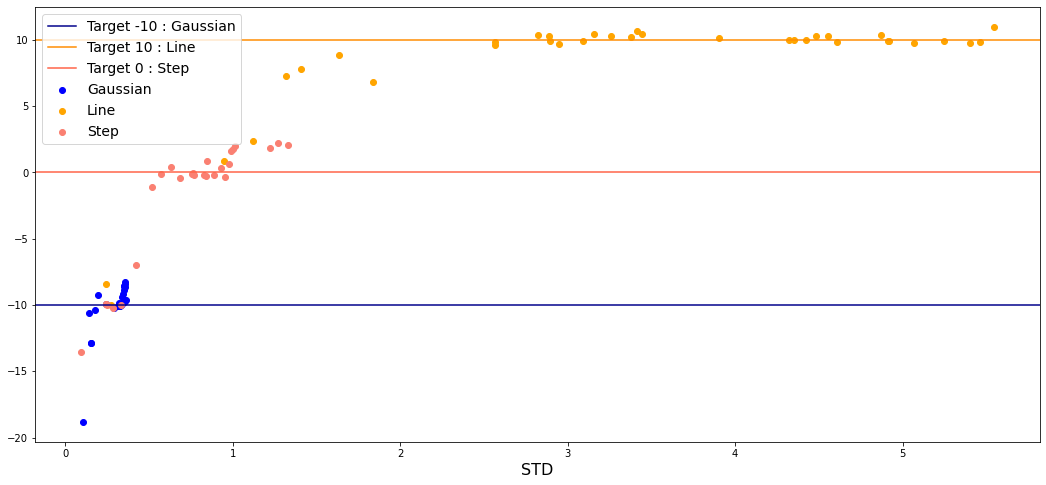

In [26]:
for i in ['MEAN','STD']:

    plt.figure(figsize=(18,8))
    plt.xlabel(i,size = 16)
    scatter_plot(function,features,i,dic_goals,classes=classes)
    plt.legend(fontsize = 14)

### Histogram plot :

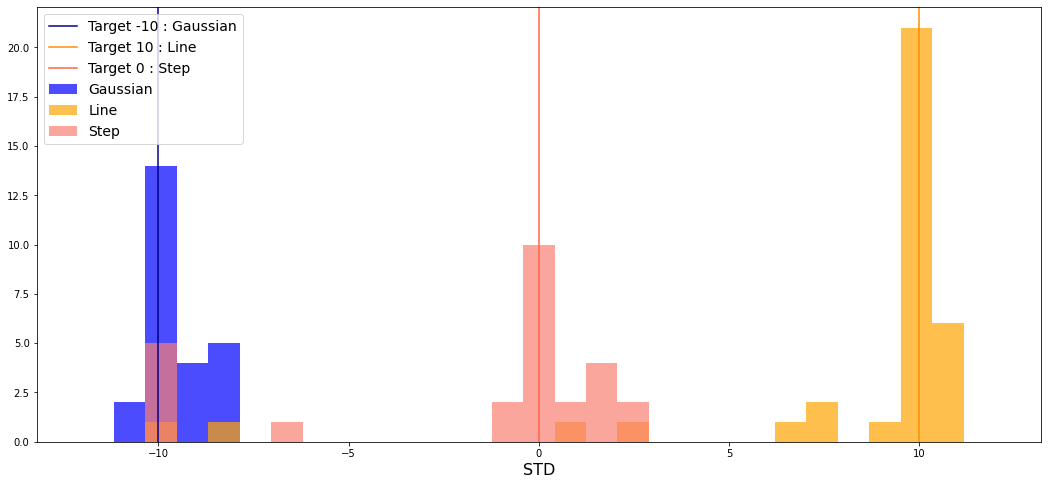

In [27]:
bins = np.linspace(-12,12,30)

plt.figure(figsize=(18,8))
plt.xlabel(i,size = 16)
histo_plot(function,features,dic_goals,bins,classes = classes, alpha = 0.7)
plt.legend(fontsize = 14)